In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import accuracy_score


from featexp import get_trend_stats
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from numpy import sort
import lightgbm as lgb
from sklearn.decomposition import PCA

## Load data

In [2]:
# dir_data = "/Users/romulo/Documents/Dataset/Earthquake Damage/"
# #dir_data = "Dataset/"
# df_x_train = pd.read_csv(dir_data+"train_values.csv",index_col="building_id")
# print("df_x_train",df_x_train.shape)
# df_y_train = pd.read_csv(dir_data+"train_labels.csv",index_col="building_id")
# df_x_test = pd.read_csv(dir_data+"test_values.csv",index_col="building_id")
# print("df_x_test",df_x_test.shape)

dir_data = "/home/dslab/Documents/rodrigo/poggi/challenge_earthquake/Dataset/"
#dir_data = "Dataset/"
df_x_train = pd.read_csv(dir_data+"labels_risk_area_train.csv",index_col="building_id") 
print("df_x_train",df_x_train.shape)
df_y_train = pd.read_csv(dir_data+"train_labels.csv",index_col="building_id")
df_x_test = pd.read_csv(dir_data+"labels_risk_area_test.csv",index_col="building_id")
print("df_x_test",df_x_test.shape)

#df_x_train = df_x_train[:100]
#df_y_train = df_y_train[:100]
#df_x_test = df_x_test[:100]

data_train = df_x_train.merge(df_y_train, how='left', left_index=True, right_index=True)
print("data_train",data_train.shape)


print("len train:",len(data_train))
print("len train:",len(df_x_test))

df_x_train (234541, 39)
df_x_test (86868, 39)
data_train (234541, 40)
len train: 234541
len train: 86868


## Preparate data

In [3]:
# get y train
y_train = data_train['damage_grade'].values

# remove y of data_train
data_train = data_train.drop('damage_grade', 1)

In [4]:
# let's put the train data and test data together to make get_dummies and then divide
df_x_all = data_train.append(df_x_test)
print("df_x_all:",df_x_all.shape)

# get dummies from cat columns
cat_var = [key for key in dict(df_x_all.dtypes) if dict(df_x_all.dtypes)[key] in ['object'] ]
df_x_all = pd.get_dummies(df_x_all, prefix=cat_var, columns=cat_var)

#divide x_train and x_test
x_train = df_x_all.iloc[:len(data_train)]
x_test = df_x_all.iloc[len(data_train):]

print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

df_x_all: (321409, 39)
x_train: (234541, 69)
x_test: (86868, 69)


In [5]:
x_train.shape

(234541, 69)

In [6]:
x_test.shape

(86868, 69)

In [7]:
# clear memory
del df_x_all,df_x_train,df_y_train,data_train,df_x_test

In [8]:
#get x_dev and y_dev (10% from train)
x_train, x_dev, y_train, y_dev = train_test_split( x_train, y_train, test_size=0.1, random_state=44,shuffle=True)

y_train = np.array([x-1 for x in y_train])
y_dev = np.array([x-1 for x in y_dev])

In [9]:
print("len x_train : %d  len y_train: %d " %(len(x_train),len(y_train)) )
#print("len x_dev   : %d  len y_dev  : %d " %(len(x_dev),len(y_dev)) )
print("len x_test  : %d" %(len(x_test)) )

len x_train : 211086  len y_train: 211086 
len x_test  : 86868


1    120120
2     70516
0     20450
Name: y_train, dtype: int64


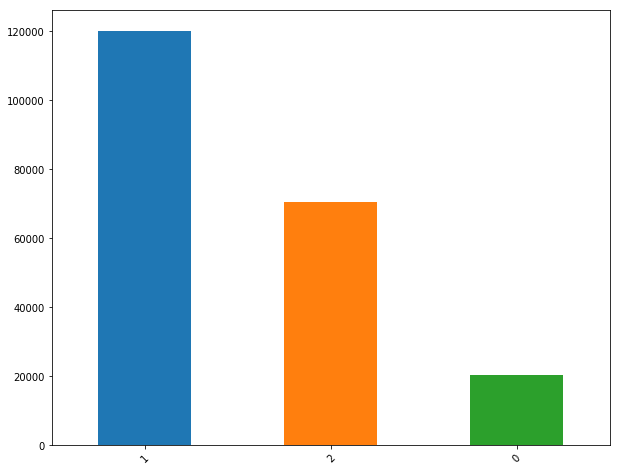

In [10]:
d = {'y_train': y_train}
df_y_train = pd.DataFrame(d)
print(df_y_train["y_train"].value_counts())
df_y_train["y_train"].value_counts().plot.bar( figsize = (10, 8), rot=45 )

## Features

In [11]:
x_all = x_train.append(x_dev)
y_all = np.concatenate((y_train, y_dev))

## Testing

In [12]:
d_train = lgb.Dataset(x_train, label=y_train)

In [13]:
d_val = lgb.Dataset(x_dev, label=y_dev)

In [14]:
params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 25
params['min_data'] = 30
params['max_depth'] = 10
params['num_class'] = 3
clf = lgb.train(params, d_train, 8000,valid_sets=[d_val])

[1]	valid_0's multi_logloss: 0.889954
[2]	valid_0's multi_logloss: 0.869989
[3]	valid_0's multi_logloss: 0.853314
[4]	valid_0's multi_logloss: 0.845834
[5]	valid_0's multi_logloss: 0.834157
[6]	valid_0's multi_logloss: 0.818171
[7]	valid_0's multi_logloss: 0.803654
[8]	valid_0's multi_logloss: 0.790082
[9]	valid_0's multi_logloss: 0.779709
[10]	valid_0's multi_logloss: 0.773074
[11]	valid_0's multi_logloss: 0.761745
[12]	valid_0's multi_logloss: 0.754415
[13]	valid_0's multi_logloss: 0.74736
[14]	valid_0's multi_logloss: 0.741009
[15]	valid_0's multi_logloss: 0.732141
[16]	valid_0's multi_logloss: 0.72725
[17]	valid_0's multi_logloss: 0.722147
[18]	valid_0's multi_logloss: 0.718924
[19]	valid_0's multi_logloss: 0.713452
[20]	valid_0's multi_logloss: 0.706381
[21]	valid_0's multi_logloss: 0.699741
[22]	valid_0's multi_logloss: 0.694388
[23]	valid_0's multi_logloss: 0.688261
[24]	valid_0's multi_logloss: 0.684267
[25]	valid_0's multi_logloss: 0.679001
[26]	valid_0's multi_logloss: 0.6739

[210]	valid_0's multi_logloss: 0.582556
[211]	valid_0's multi_logloss: 0.58251
[212]	valid_0's multi_logloss: 0.582423
[213]	valid_0's multi_logloss: 0.582366
[214]	valid_0's multi_logloss: 0.582316
[215]	valid_0's multi_logloss: 0.582283
[216]	valid_0's multi_logloss: 0.582207
[217]	valid_0's multi_logloss: 0.58215
[218]	valid_0's multi_logloss: 0.582102
[219]	valid_0's multi_logloss: 0.582063
[220]	valid_0's multi_logloss: 0.582009
[221]	valid_0's multi_logloss: 0.581966
[222]	valid_0's multi_logloss: 0.581915
[223]	valid_0's multi_logloss: 0.581874
[224]	valid_0's multi_logloss: 0.581826
[225]	valid_0's multi_logloss: 0.581759
[226]	valid_0's multi_logloss: 0.581733
[227]	valid_0's multi_logloss: 0.581681
[228]	valid_0's multi_logloss: 0.581654
[229]	valid_0's multi_logloss: 0.581625
[230]	valid_0's multi_logloss: 0.581581
[231]	valid_0's multi_logloss: 0.581533
[232]	valid_0's multi_logloss: 0.581481
[233]	valid_0's multi_logloss: 0.581431
[234]	valid_0's multi_logloss: 0.581366
[2

[420]	valid_0's multi_logloss: 0.575482
[421]	valid_0's multi_logloss: 0.575465
[422]	valid_0's multi_logloss: 0.575424
[423]	valid_0's multi_logloss: 0.575411
[424]	valid_0's multi_logloss: 0.575374
[425]	valid_0's multi_logloss: 0.575353
[426]	valid_0's multi_logloss: 0.575335
[427]	valid_0's multi_logloss: 0.575312
[428]	valid_0's multi_logloss: 0.575291
[429]	valid_0's multi_logloss: 0.575273
[430]	valid_0's multi_logloss: 0.575267
[431]	valid_0's multi_logloss: 0.575237
[432]	valid_0's multi_logloss: 0.575199
[433]	valid_0's multi_logloss: 0.575187
[434]	valid_0's multi_logloss: 0.575179
[435]	valid_0's multi_logloss: 0.575163
[436]	valid_0's multi_logloss: 0.575155
[437]	valid_0's multi_logloss: 0.575127
[438]	valid_0's multi_logloss: 0.575104
[439]	valid_0's multi_logloss: 0.57509
[440]	valid_0's multi_logloss: 0.575078
[441]	valid_0's multi_logloss: 0.575071
[442]	valid_0's multi_logloss: 0.575009
[443]	valid_0's multi_logloss: 0.574992
[444]	valid_0's multi_logloss: 0.574973
[

[629]	valid_0's multi_logloss: 0.572156
[630]	valid_0's multi_logloss: 0.572136
[631]	valid_0's multi_logloss: 0.572128
[632]	valid_0's multi_logloss: 0.572117
[633]	valid_0's multi_logloss: 0.572105
[634]	valid_0's multi_logloss: 0.572089
[635]	valid_0's multi_logloss: 0.572079
[636]	valid_0's multi_logloss: 0.572072
[637]	valid_0's multi_logloss: 0.572069
[638]	valid_0's multi_logloss: 0.57206
[639]	valid_0's multi_logloss: 0.572041
[640]	valid_0's multi_logloss: 0.572011
[641]	valid_0's multi_logloss: 0.572008
[642]	valid_0's multi_logloss: 0.572009
[643]	valid_0's multi_logloss: 0.571994
[644]	valid_0's multi_logloss: 0.571965
[645]	valid_0's multi_logloss: 0.57194
[646]	valid_0's multi_logloss: 0.571924
[647]	valid_0's multi_logloss: 0.571926
[648]	valid_0's multi_logloss: 0.571923
[649]	valid_0's multi_logloss: 0.571918
[650]	valid_0's multi_logloss: 0.571904
[651]	valid_0's multi_logloss: 0.571893
[652]	valid_0's multi_logloss: 0.571873
[653]	valid_0's multi_logloss: 0.571851
[6

[844]	valid_0's multi_logloss: 0.569636
[845]	valid_0's multi_logloss: 0.569616
[846]	valid_0's multi_logloss: 0.56961
[847]	valid_0's multi_logloss: 0.569606
[848]	valid_0's multi_logloss: 0.569613
[849]	valid_0's multi_logloss: 0.569601
[850]	valid_0's multi_logloss: 0.569596
[851]	valid_0's multi_logloss: 0.569572
[852]	valid_0's multi_logloss: 0.569569
[853]	valid_0's multi_logloss: 0.569555
[854]	valid_0's multi_logloss: 0.569545
[855]	valid_0's multi_logloss: 0.569539
[856]	valid_0's multi_logloss: 0.569539
[857]	valid_0's multi_logloss: 0.569538
[858]	valid_0's multi_logloss: 0.569544
[859]	valid_0's multi_logloss: 0.569547
[860]	valid_0's multi_logloss: 0.569548
[861]	valid_0's multi_logloss: 0.569536
[862]	valid_0's multi_logloss: 0.569539
[863]	valid_0's multi_logloss: 0.569516
[864]	valid_0's multi_logloss: 0.569494
[865]	valid_0's multi_logloss: 0.569482
[866]	valid_0's multi_logloss: 0.569462
[867]	valid_0's multi_logloss: 0.569456
[868]	valid_0's multi_logloss: 0.569447
[

[1061]	valid_0's multi_logloss: 0.567668
[1062]	valid_0's multi_logloss: 0.567647
[1063]	valid_0's multi_logloss: 0.567629
[1064]	valid_0's multi_logloss: 0.567627
[1065]	valid_0's multi_logloss: 0.567603
[1066]	valid_0's multi_logloss: 0.567607
[1067]	valid_0's multi_logloss: 0.567588
[1068]	valid_0's multi_logloss: 0.567589
[1069]	valid_0's multi_logloss: 0.567585
[1070]	valid_0's multi_logloss: 0.567582
[1071]	valid_0's multi_logloss: 0.567578
[1072]	valid_0's multi_logloss: 0.567566
[1073]	valid_0's multi_logloss: 0.567563
[1074]	valid_0's multi_logloss: 0.56755
[1075]	valid_0's multi_logloss: 0.567542
[1076]	valid_0's multi_logloss: 0.567535
[1077]	valid_0's multi_logloss: 0.567527
[1078]	valid_0's multi_logloss: 0.567516
[1079]	valid_0's multi_logloss: 0.567513
[1080]	valid_0's multi_logloss: 0.567493
[1081]	valid_0's multi_logloss: 0.567475
[1082]	valid_0's multi_logloss: 0.567475
[1083]	valid_0's multi_logloss: 0.567472
[1084]	valid_0's multi_logloss: 0.56745
[1085]	valid_0's m

[1263]	valid_0's multi_logloss: 0.566217
[1264]	valid_0's multi_logloss: 0.566216
[1265]	valid_0's multi_logloss: 0.566203
[1266]	valid_0's multi_logloss: 0.566197
[1267]	valid_0's multi_logloss: 0.5662
[1268]	valid_0's multi_logloss: 0.566199
[1269]	valid_0's multi_logloss: 0.566194
[1270]	valid_0's multi_logloss: 0.566188
[1271]	valid_0's multi_logloss: 0.566165
[1272]	valid_0's multi_logloss: 0.566166
[1273]	valid_0's multi_logloss: 0.566162
[1274]	valid_0's multi_logloss: 0.566167
[1275]	valid_0's multi_logloss: 0.566152
[1276]	valid_0's multi_logloss: 0.566133
[1277]	valid_0's multi_logloss: 0.566126
[1278]	valid_0's multi_logloss: 0.566128
[1279]	valid_0's multi_logloss: 0.566117
[1280]	valid_0's multi_logloss: 0.566103
[1281]	valid_0's multi_logloss: 0.566084
[1282]	valid_0's multi_logloss: 0.566072
[1283]	valid_0's multi_logloss: 0.566059
[1284]	valid_0's multi_logloss: 0.566054
[1285]	valid_0's multi_logloss: 0.566036
[1286]	valid_0's multi_logloss: 0.566039
[1287]	valid_0's m

[1472]	valid_0's multi_logloss: 0.564949
[1473]	valid_0's multi_logloss: 0.56494
[1474]	valid_0's multi_logloss: 0.564926
[1475]	valid_0's multi_logloss: 0.564932
[1476]	valid_0's multi_logloss: 0.564925
[1477]	valid_0's multi_logloss: 0.564905
[1478]	valid_0's multi_logloss: 0.564904
[1479]	valid_0's multi_logloss: 0.56489
[1480]	valid_0's multi_logloss: 0.564884
[1481]	valid_0's multi_logloss: 0.564889
[1482]	valid_0's multi_logloss: 0.564886
[1483]	valid_0's multi_logloss: 0.56487
[1484]	valid_0's multi_logloss: 0.564863
[1485]	valid_0's multi_logloss: 0.564861
[1486]	valid_0's multi_logloss: 0.564839
[1487]	valid_0's multi_logloss: 0.564832
[1488]	valid_0's multi_logloss: 0.564829
[1489]	valid_0's multi_logloss: 0.564821
[1490]	valid_0's multi_logloss: 0.564824
[1491]	valid_0's multi_logloss: 0.564826
[1492]	valid_0's multi_logloss: 0.564815
[1493]	valid_0's multi_logloss: 0.564815
[1494]	valid_0's multi_logloss: 0.564818
[1495]	valid_0's multi_logloss: 0.564811
[1496]	valid_0's mu

[1675]	valid_0's multi_logloss: 0.5639
[1676]	valid_0's multi_logloss: 0.563892
[1677]	valid_0's multi_logloss: 0.563887
[1678]	valid_0's multi_logloss: 0.563893
[1679]	valid_0's multi_logloss: 0.563892
[1680]	valid_0's multi_logloss: 0.563883
[1681]	valid_0's multi_logloss: 0.563884
[1682]	valid_0's multi_logloss: 0.563871
[1683]	valid_0's multi_logloss: 0.563871
[1684]	valid_0's multi_logloss: 0.563882
[1685]	valid_0's multi_logloss: 0.563879
[1686]	valid_0's multi_logloss: 0.563885
[1687]	valid_0's multi_logloss: 0.563881
[1688]	valid_0's multi_logloss: 0.563885
[1689]	valid_0's multi_logloss: 0.563878
[1690]	valid_0's multi_logloss: 0.563882
[1691]	valid_0's multi_logloss: 0.563893
[1692]	valid_0's multi_logloss: 0.563886
[1693]	valid_0's multi_logloss: 0.563886
[1694]	valid_0's multi_logloss: 0.563884
[1695]	valid_0's multi_logloss: 0.563883
[1696]	valid_0's multi_logloss: 0.563861
[1697]	valid_0's multi_logloss: 0.563862
[1698]	valid_0's multi_logloss: 0.563864
[1699]	valid_0's m

[1883]	valid_0's multi_logloss: 0.563102
[1884]	valid_0's multi_logloss: 0.563099
[1885]	valid_0's multi_logloss: 0.563102
[1886]	valid_0's multi_logloss: 0.563098
[1887]	valid_0's multi_logloss: 0.563089
[1888]	valid_0's multi_logloss: 0.563082
[1889]	valid_0's multi_logloss: 0.563079
[1890]	valid_0's multi_logloss: 0.563081
[1891]	valid_0's multi_logloss: 0.563056
[1892]	valid_0's multi_logloss: 0.563057
[1893]	valid_0's multi_logloss: 0.563046
[1894]	valid_0's multi_logloss: 0.563034
[1895]	valid_0's multi_logloss: 0.563032
[1896]	valid_0's multi_logloss: 0.56303
[1897]	valid_0's multi_logloss: 0.563026
[1898]	valid_0's multi_logloss: 0.563011
[1899]	valid_0's multi_logloss: 0.563014
[1900]	valid_0's multi_logloss: 0.563004
[1901]	valid_0's multi_logloss: 0.563
[1902]	valid_0's multi_logloss: 0.562994
[1903]	valid_0's multi_logloss: 0.562984
[1904]	valid_0's multi_logloss: 0.562979
[1905]	valid_0's multi_logloss: 0.562973
[1906]	valid_0's multi_logloss: 0.562972
[1907]	valid_0's mul

[2087]	valid_0's multi_logloss: 0.562264
[2088]	valid_0's multi_logloss: 0.562258
[2089]	valid_0's multi_logloss: 0.562252
[2090]	valid_0's multi_logloss: 0.562251
[2091]	valid_0's multi_logloss: 0.562257
[2092]	valid_0's multi_logloss: 0.562251
[2093]	valid_0's multi_logloss: 0.562252
[2094]	valid_0's multi_logloss: 0.562249
[2095]	valid_0's multi_logloss: 0.562252
[2096]	valid_0's multi_logloss: 0.562253
[2097]	valid_0's multi_logloss: 0.562256
[2098]	valid_0's multi_logloss: 0.562249
[2099]	valid_0's multi_logloss: 0.56225
[2100]	valid_0's multi_logloss: 0.562244
[2101]	valid_0's multi_logloss: 0.562237
[2102]	valid_0's multi_logloss: 0.562241
[2103]	valid_0's multi_logloss: 0.562239
[2104]	valid_0's multi_logloss: 0.562221
[2105]	valid_0's multi_logloss: 0.562217
[2106]	valid_0's multi_logloss: 0.562208
[2107]	valid_0's multi_logloss: 0.562202
[2108]	valid_0's multi_logloss: 0.562199
[2109]	valid_0's multi_logloss: 0.562186
[2110]	valid_0's multi_logloss: 0.562181
[2111]	valid_0's 

[2299]	valid_0's multi_logloss: 0.561739
[2300]	valid_0's multi_logloss: 0.561741
[2301]	valid_0's multi_logloss: 0.561724
[2302]	valid_0's multi_logloss: 0.561724
[2303]	valid_0's multi_logloss: 0.561726
[2304]	valid_0's multi_logloss: 0.561719
[2305]	valid_0's multi_logloss: 0.561727
[2306]	valid_0's multi_logloss: 0.561733
[2307]	valid_0's multi_logloss: 0.56174
[2308]	valid_0's multi_logloss: 0.56174
[2309]	valid_0's multi_logloss: 0.561738
[2310]	valid_0's multi_logloss: 0.561719
[2311]	valid_0's multi_logloss: 0.561724
[2312]	valid_0's multi_logloss: 0.561728
[2313]	valid_0's multi_logloss: 0.561731
[2314]	valid_0's multi_logloss: 0.561728
[2315]	valid_0's multi_logloss: 0.561728
[2316]	valid_0's multi_logloss: 0.56173
[2317]	valid_0's multi_logloss: 0.561734
[2318]	valid_0's multi_logloss: 0.561727
[2319]	valid_0's multi_logloss: 0.561725
[2320]	valid_0's multi_logloss: 0.561723
[2321]	valid_0's multi_logloss: 0.561725
[2322]	valid_0's multi_logloss: 0.561727
[2323]	valid_0's mu

[2509]	valid_0's multi_logloss: 0.561367
[2510]	valid_0's multi_logloss: 0.561353
[2511]	valid_0's multi_logloss: 0.561345
[2512]	valid_0's multi_logloss: 0.561344
[2513]	valid_0's multi_logloss: 0.56134
[2514]	valid_0's multi_logloss: 0.561348
[2515]	valid_0's multi_logloss: 0.561353
[2516]	valid_0's multi_logloss: 0.56136
[2517]	valid_0's multi_logloss: 0.561364
[2518]	valid_0's multi_logloss: 0.561365
[2519]	valid_0's multi_logloss: 0.561366
[2520]	valid_0's multi_logloss: 0.561366
[2521]	valid_0's multi_logloss: 0.561363
[2522]	valid_0's multi_logloss: 0.561357
[2523]	valid_0's multi_logloss: 0.561368
[2524]	valid_0's multi_logloss: 0.561364
[2525]	valid_0's multi_logloss: 0.561361
[2526]	valid_0's multi_logloss: 0.561367
[2527]	valid_0's multi_logloss: 0.561342
[2528]	valid_0's multi_logloss: 0.56134
[2529]	valid_0's multi_logloss: 0.561341
[2530]	valid_0's multi_logloss: 0.561341
[2531]	valid_0's multi_logloss: 0.561339
[2532]	valid_0's multi_logloss: 0.561335
[2533]	valid_0's mu

[2721]	valid_0's multi_logloss: 0.560966
[2722]	valid_0's multi_logloss: 0.560961
[2723]	valid_0's multi_logloss: 0.56097
[2724]	valid_0's multi_logloss: 0.560967
[2725]	valid_0's multi_logloss: 0.56097
[2726]	valid_0's multi_logloss: 0.560976
[2727]	valid_0's multi_logloss: 0.560976
[2728]	valid_0's multi_logloss: 0.560973
[2729]	valid_0's multi_logloss: 0.560975
[2730]	valid_0's multi_logloss: 0.560977
[2731]	valid_0's multi_logloss: 0.560976
[2732]	valid_0's multi_logloss: 0.560977
[2733]	valid_0's multi_logloss: 0.560981
[2734]	valid_0's multi_logloss: 0.560978
[2735]	valid_0's multi_logloss: 0.560972
[2736]	valid_0's multi_logloss: 0.560978
[2737]	valid_0's multi_logloss: 0.560971
[2738]	valid_0's multi_logloss: 0.56098
[2739]	valid_0's multi_logloss: 0.560981
[2740]	valid_0's multi_logloss: 0.560979
[2741]	valid_0's multi_logloss: 0.560969
[2742]	valid_0's multi_logloss: 0.560971
[2743]	valid_0's multi_logloss: 0.560977
[2744]	valid_0's multi_logloss: 0.560961
[2745]	valid_0's mu

[2930]	valid_0's multi_logloss: 0.560669
[2931]	valid_0's multi_logloss: 0.560672
[2932]	valid_0's multi_logloss: 0.560667
[2933]	valid_0's multi_logloss: 0.560663
[2934]	valid_0's multi_logloss: 0.56067
[2935]	valid_0's multi_logloss: 0.560675
[2936]	valid_0's multi_logloss: 0.560675
[2937]	valid_0's multi_logloss: 0.560672
[2938]	valid_0's multi_logloss: 0.560668
[2939]	valid_0's multi_logloss: 0.560665
[2940]	valid_0's multi_logloss: 0.56066
[2941]	valid_0's multi_logloss: 0.560651
[2942]	valid_0's multi_logloss: 0.560652
[2943]	valid_0's multi_logloss: 0.560655
[2944]	valid_0's multi_logloss: 0.560666
[2945]	valid_0's multi_logloss: 0.560662
[2946]	valid_0's multi_logloss: 0.560666
[2947]	valid_0's multi_logloss: 0.560662
[2948]	valid_0's multi_logloss: 0.560662
[2949]	valid_0's multi_logloss: 0.560656
[2950]	valid_0's multi_logloss: 0.560649
[2951]	valid_0's multi_logloss: 0.560646
[2952]	valid_0's multi_logloss: 0.56064
[2953]	valid_0's multi_logloss: 0.560647
[2954]	valid_0's mu

[3141]	valid_0's multi_logloss: 0.560173
[3142]	valid_0's multi_logloss: 0.56018
[3143]	valid_0's multi_logloss: 0.56017
[3144]	valid_0's multi_logloss: 0.560168
[3145]	valid_0's multi_logloss: 0.560166
[3146]	valid_0's multi_logloss: 0.560164
[3147]	valid_0's multi_logloss: 0.56016
[3148]	valid_0's multi_logloss: 0.560157
[3149]	valid_0's multi_logloss: 0.560138
[3150]	valid_0's multi_logloss: 0.56013
[3151]	valid_0's multi_logloss: 0.560128
[3152]	valid_0's multi_logloss: 0.560129
[3153]	valid_0's multi_logloss: 0.560133
[3154]	valid_0's multi_logloss: 0.560118
[3155]	valid_0's multi_logloss: 0.56012
[3156]	valid_0's multi_logloss: 0.560116
[3157]	valid_0's multi_logloss: 0.56011
[3158]	valid_0's multi_logloss: 0.560107
[3159]	valid_0's multi_logloss: 0.56011
[3160]	valid_0's multi_logloss: 0.56011
[3161]	valid_0's multi_logloss: 0.560102
[3162]	valid_0's multi_logloss: 0.560099
[3163]	valid_0's multi_logloss: 0.560092
[3164]	valid_0's multi_logloss: 0.560091
[3165]	valid_0's multi_l

[3351]	valid_0's multi_logloss: 0.559694
[3352]	valid_0's multi_logloss: 0.559697
[3353]	valid_0's multi_logloss: 0.559703
[3354]	valid_0's multi_logloss: 0.5597
[3355]	valid_0's multi_logloss: 0.559702
[3356]	valid_0's multi_logloss: 0.55969
[3357]	valid_0's multi_logloss: 0.559701
[3358]	valid_0's multi_logloss: 0.559703
[3359]	valid_0's multi_logloss: 0.559691
[3360]	valid_0's multi_logloss: 0.559683
[3361]	valid_0's multi_logloss: 0.559675
[3362]	valid_0's multi_logloss: 0.559674
[3363]	valid_0's multi_logloss: 0.559665
[3364]	valid_0's multi_logloss: 0.559659
[3365]	valid_0's multi_logloss: 0.559655
[3366]	valid_0's multi_logloss: 0.559641
[3367]	valid_0's multi_logloss: 0.559637
[3368]	valid_0's multi_logloss: 0.559632
[3369]	valid_0's multi_logloss: 0.559627
[3370]	valid_0's multi_logloss: 0.559626
[3371]	valid_0's multi_logloss: 0.55962
[3372]	valid_0's multi_logloss: 0.55962
[3373]	valid_0's multi_logloss: 0.559623
[3374]	valid_0's multi_logloss: 0.55962
[3375]	valid_0's multi

[3558]	valid_0's multi_logloss: 0.559578
[3559]	valid_0's multi_logloss: 0.559582
[3560]	valid_0's multi_logloss: 0.559579
[3561]	valid_0's multi_logloss: 0.559568
[3562]	valid_0's multi_logloss: 0.559565
[3563]	valid_0's multi_logloss: 0.559558
[3564]	valid_0's multi_logloss: 0.559557
[3565]	valid_0's multi_logloss: 0.559558
[3566]	valid_0's multi_logloss: 0.559562
[3567]	valid_0's multi_logloss: 0.559563
[3568]	valid_0's multi_logloss: 0.55956
[3569]	valid_0's multi_logloss: 0.559554
[3570]	valid_0's multi_logloss: 0.559554
[3571]	valid_0's multi_logloss: 0.559549
[3572]	valid_0's multi_logloss: 0.559546
[3573]	valid_0's multi_logloss: 0.559543
[3574]	valid_0's multi_logloss: 0.559546
[3575]	valid_0's multi_logloss: 0.559544
[3576]	valid_0's multi_logloss: 0.559541
[3577]	valid_0's multi_logloss: 0.559543
[3578]	valid_0's multi_logloss: 0.559533
[3579]	valid_0's multi_logloss: 0.559524
[3580]	valid_0's multi_logloss: 0.559522
[3581]	valid_0's multi_logloss: 0.559528
[3582]	valid_0's 

[3761]	valid_0's multi_logloss: 0.559342
[3762]	valid_0's multi_logloss: 0.559349
[3763]	valid_0's multi_logloss: 0.559346
[3764]	valid_0's multi_logloss: 0.559335
[3765]	valid_0's multi_logloss: 0.55933
[3766]	valid_0's multi_logloss: 0.55934
[3767]	valid_0's multi_logloss: 0.559336
[3768]	valid_0's multi_logloss: 0.559337
[3769]	valid_0's multi_logloss: 0.559335
[3770]	valid_0's multi_logloss: 0.559324
[3771]	valid_0's multi_logloss: 0.559312
[3772]	valid_0's multi_logloss: 0.559317
[3773]	valid_0's multi_logloss: 0.55932
[3774]	valid_0's multi_logloss: 0.559319
[3775]	valid_0's multi_logloss: 0.559326
[3776]	valid_0's multi_logloss: 0.559318
[3777]	valid_0's multi_logloss: 0.559316
[3778]	valid_0's multi_logloss: 0.559312
[3779]	valid_0's multi_logloss: 0.559318
[3780]	valid_0's multi_logloss: 0.559323
[3781]	valid_0's multi_logloss: 0.559326
[3782]	valid_0's multi_logloss: 0.559326
[3783]	valid_0's multi_logloss: 0.559325
[3784]	valid_0's multi_logloss: 0.559327
[3785]	valid_0's mu

[3974]	valid_0's multi_logloss: 0.559221
[3975]	valid_0's multi_logloss: 0.559221
[3976]	valid_0's multi_logloss: 0.559224
[3977]	valid_0's multi_logloss: 0.559223
[3978]	valid_0's multi_logloss: 0.559221
[3979]	valid_0's multi_logloss: 0.559222
[3980]	valid_0's multi_logloss: 0.559216
[3981]	valid_0's multi_logloss: 0.559215
[3982]	valid_0's multi_logloss: 0.559217
[3983]	valid_0's multi_logloss: 0.559214
[3984]	valid_0's multi_logloss: 0.559212
[3985]	valid_0's multi_logloss: 0.559215
[3986]	valid_0's multi_logloss: 0.55921
[3987]	valid_0's multi_logloss: 0.559203
[3988]	valid_0's multi_logloss: 0.559202
[3989]	valid_0's multi_logloss: 0.559206
[3990]	valid_0's multi_logloss: 0.5592
[3991]	valid_0's multi_logloss: 0.559199
[3992]	valid_0's multi_logloss: 0.559203
[3993]	valid_0's multi_logloss: 0.559194
[3994]	valid_0's multi_logloss: 0.559192
[3995]	valid_0's multi_logloss: 0.559186
[3996]	valid_0's multi_logloss: 0.559181
[3997]	valid_0's multi_logloss: 0.559178
[3998]	valid_0's mu

[4175]	valid_0's multi_logloss: 0.559192
[4176]	valid_0's multi_logloss: 0.559196
[4177]	valid_0's multi_logloss: 0.559202
[4178]	valid_0's multi_logloss: 0.559195
[4179]	valid_0's multi_logloss: 0.559195
[4180]	valid_0's multi_logloss: 0.559196
[4181]	valid_0's multi_logloss: 0.559196
[4182]	valid_0's multi_logloss: 0.559195
[4183]	valid_0's multi_logloss: 0.559195
[4184]	valid_0's multi_logloss: 0.559194
[4185]	valid_0's multi_logloss: 0.559201
[4186]	valid_0's multi_logloss: 0.559191
[4187]	valid_0's multi_logloss: 0.559196
[4188]	valid_0's multi_logloss: 0.559188
[4189]	valid_0's multi_logloss: 0.559182
[4190]	valid_0's multi_logloss: 0.559186
[4191]	valid_0's multi_logloss: 0.559185
[4192]	valid_0's multi_logloss: 0.559188
[4193]	valid_0's multi_logloss: 0.559197
[4194]	valid_0's multi_logloss: 0.559196
[4195]	valid_0's multi_logloss: 0.559194
[4196]	valid_0's multi_logloss: 0.559194
[4197]	valid_0's multi_logloss: 0.559182
[4198]	valid_0's multi_logloss: 0.559173
[4199]	valid_0's

[4378]	valid_0's multi_logloss: 0.559134
[4379]	valid_0's multi_logloss: 0.55913
[4380]	valid_0's multi_logloss: 0.559135
[4381]	valid_0's multi_logloss: 0.559134
[4382]	valid_0's multi_logloss: 0.559138
[4383]	valid_0's multi_logloss: 0.55913
[4384]	valid_0's multi_logloss: 0.559123
[4385]	valid_0's multi_logloss: 0.55913
[4386]	valid_0's multi_logloss: 0.559132
[4387]	valid_0's multi_logloss: 0.559132
[4388]	valid_0's multi_logloss: 0.559129
[4389]	valid_0's multi_logloss: 0.559133
[4390]	valid_0's multi_logloss: 0.559135
[4391]	valid_0's multi_logloss: 0.559141
[4392]	valid_0's multi_logloss: 0.559141
[4393]	valid_0's multi_logloss: 0.559135
[4394]	valid_0's multi_logloss: 0.559132
[4395]	valid_0's multi_logloss: 0.559138
[4396]	valid_0's multi_logloss: 0.559138
[4397]	valid_0's multi_logloss: 0.559133
[4398]	valid_0's multi_logloss: 0.559133
[4399]	valid_0's multi_logloss: 0.55913
[4400]	valid_0's multi_logloss: 0.55913
[4401]	valid_0's multi_logloss: 0.559132
[4402]	valid_0's mult

[4590]	valid_0's multi_logloss: 0.559179
[4591]	valid_0's multi_logloss: 0.559177
[4592]	valid_0's multi_logloss: 0.55918
[4593]	valid_0's multi_logloss: 0.559181
[4594]	valid_0's multi_logloss: 0.559181
[4595]	valid_0's multi_logloss: 0.559188
[4596]	valid_0's multi_logloss: 0.559189
[4597]	valid_0's multi_logloss: 0.559185
[4598]	valid_0's multi_logloss: 0.559191
[4599]	valid_0's multi_logloss: 0.559195
[4600]	valid_0's multi_logloss: 0.5592
[4601]	valid_0's multi_logloss: 0.559197
[4602]	valid_0's multi_logloss: 0.559194
[4603]	valid_0's multi_logloss: 0.559196
[4604]	valid_0's multi_logloss: 0.559189
[4605]	valid_0's multi_logloss: 0.559184
[4606]	valid_0's multi_logloss: 0.559184
[4607]	valid_0's multi_logloss: 0.559189
[4608]	valid_0's multi_logloss: 0.559194
[4609]	valid_0's multi_logloss: 0.559189
[4610]	valid_0's multi_logloss: 0.559192
[4611]	valid_0's multi_logloss: 0.559191
[4612]	valid_0's multi_logloss: 0.559195
[4613]	valid_0's multi_logloss: 0.559191
[4614]	valid_0's mu

[4799]	valid_0's multi_logloss: 0.559318
[4800]	valid_0's multi_logloss: 0.55932
[4801]	valid_0's multi_logloss: 0.559311
[4802]	valid_0's multi_logloss: 0.559319
[4803]	valid_0's multi_logloss: 0.559325
[4804]	valid_0's multi_logloss: 0.559322
[4805]	valid_0's multi_logloss: 0.559321
[4806]	valid_0's multi_logloss: 0.559327
[4807]	valid_0's multi_logloss: 0.559331
[4808]	valid_0's multi_logloss: 0.559328
[4809]	valid_0's multi_logloss: 0.559327
[4810]	valid_0's multi_logloss: 0.559332
[4811]	valid_0's multi_logloss: 0.559329
[4812]	valid_0's multi_logloss: 0.559334
[4813]	valid_0's multi_logloss: 0.559321
[4814]	valid_0's multi_logloss: 0.559321
[4815]	valid_0's multi_logloss: 0.559318
[4816]	valid_0's multi_logloss: 0.55932
[4817]	valid_0's multi_logloss: 0.55932
[4818]	valid_0's multi_logloss: 0.559323
[4819]	valid_0's multi_logloss: 0.559327
[4820]	valid_0's multi_logloss: 0.559333
[4821]	valid_0's multi_logloss: 0.559335
[4822]	valid_0's multi_logloss: 0.559335
[4823]	valid_0's mu

[5012]	valid_0's multi_logloss: 0.559388
[5013]	valid_0's multi_logloss: 0.559392
[5014]	valid_0's multi_logloss: 0.559398
[5015]	valid_0's multi_logloss: 0.559394
[5016]	valid_0's multi_logloss: 0.559397
[5017]	valid_0's multi_logloss: 0.559398
[5018]	valid_0's multi_logloss: 0.559393
[5019]	valid_0's multi_logloss: 0.559399
[5020]	valid_0's multi_logloss: 0.5594
[5021]	valid_0's multi_logloss: 0.55941
[5022]	valid_0's multi_logloss: 0.55941
[5023]	valid_0's multi_logloss: 0.559399
[5024]	valid_0's multi_logloss: 0.559391
[5025]	valid_0's multi_logloss: 0.559393
[5026]	valid_0's multi_logloss: 0.559396
[5027]	valid_0's multi_logloss: 0.559395
[5028]	valid_0's multi_logloss: 0.559396
[5029]	valid_0's multi_logloss: 0.559393
[5030]	valid_0's multi_logloss: 0.559391
[5031]	valid_0's multi_logloss: 0.559398
[5032]	valid_0's multi_logloss: 0.559402
[5033]	valid_0's multi_logloss: 0.559404
[5034]	valid_0's multi_logloss: 0.559409
[5035]	valid_0's multi_logloss: 0.55941
[5036]	valid_0's mult

[5214]	valid_0's multi_logloss: 0.559499
[5215]	valid_0's multi_logloss: 0.559497
[5216]	valid_0's multi_logloss: 0.559492
[5217]	valid_0's multi_logloss: 0.559496
[5218]	valid_0's multi_logloss: 0.559495
[5219]	valid_0's multi_logloss: 0.559499
[5220]	valid_0's multi_logloss: 0.559507
[5221]	valid_0's multi_logloss: 0.559506
[5222]	valid_0's multi_logloss: 0.559505
[5223]	valid_0's multi_logloss: 0.559509
[5224]	valid_0's multi_logloss: 0.559508
[5225]	valid_0's multi_logloss: 0.55951
[5226]	valid_0's multi_logloss: 0.559509
[5227]	valid_0's multi_logloss: 0.559509
[5228]	valid_0's multi_logloss: 0.559502
[5229]	valid_0's multi_logloss: 0.559503
[5230]	valid_0's multi_logloss: 0.559507
[5231]	valid_0's multi_logloss: 0.559511
[5232]	valid_0's multi_logloss: 0.559509
[5233]	valid_0's multi_logloss: 0.55951
[5234]	valid_0's multi_logloss: 0.559508
[5235]	valid_0's multi_logloss: 0.559497
[5236]	valid_0's multi_logloss: 0.559495
[5237]	valid_0's multi_logloss: 0.559487
[5238]	valid_0's m

[5416]	valid_0's multi_logloss: 0.559701
[5417]	valid_0's multi_logloss: 0.559706
[5418]	valid_0's multi_logloss: 0.559708
[5419]	valid_0's multi_logloss: 0.559701
[5420]	valid_0's multi_logloss: 0.559702
[5421]	valid_0's multi_logloss: 0.559703
[5422]	valid_0's multi_logloss: 0.559707
[5423]	valid_0's multi_logloss: 0.559706
[5424]	valid_0's multi_logloss: 0.559701
[5425]	valid_0's multi_logloss: 0.559702
[5426]	valid_0's multi_logloss: 0.559715
[5427]	valid_0's multi_logloss: 0.559718
[5428]	valid_0's multi_logloss: 0.559713
[5429]	valid_0's multi_logloss: 0.55971
[5430]	valid_0's multi_logloss: 0.559711
[5431]	valid_0's multi_logloss: 0.559711
[5432]	valid_0's multi_logloss: 0.559713
[5433]	valid_0's multi_logloss: 0.559703
[5434]	valid_0's multi_logloss: 0.559699
[5435]	valid_0's multi_logloss: 0.559705
[5436]	valid_0's multi_logloss: 0.559712
[5437]	valid_0's multi_logloss: 0.559706
[5438]	valid_0's multi_logloss: 0.559706
[5439]	valid_0's multi_logloss: 0.559702
[5440]	valid_0's 

[5629]	valid_0's multi_logloss: 0.559856
[5630]	valid_0's multi_logloss: 0.559864
[5631]	valid_0's multi_logloss: 0.559871
[5632]	valid_0's multi_logloss: 0.559869
[5633]	valid_0's multi_logloss: 0.559875
[5634]	valid_0's multi_logloss: 0.559876
[5635]	valid_0's multi_logloss: 0.559878
[5636]	valid_0's multi_logloss: 0.559883
[5637]	valid_0's multi_logloss: 0.559874
[5638]	valid_0's multi_logloss: 0.559881
[5639]	valid_0's multi_logloss: 0.559881
[5640]	valid_0's multi_logloss: 0.559882
[5641]	valid_0's multi_logloss: 0.559887
[5642]	valid_0's multi_logloss: 0.559888
[5643]	valid_0's multi_logloss: 0.559889
[5644]	valid_0's multi_logloss: 0.559895
[5645]	valid_0's multi_logloss: 0.559898
[5646]	valid_0's multi_logloss: 0.559903
[5647]	valid_0's multi_logloss: 0.559913
[5648]	valid_0's multi_logloss: 0.559917
[5649]	valid_0's multi_logloss: 0.559921
[5650]	valid_0's multi_logloss: 0.559927
[5651]	valid_0's multi_logloss: 0.559926
[5652]	valid_0's multi_logloss: 0.559931
[5653]	valid_0's

[5839]	valid_0's multi_logloss: 0.560184
[5840]	valid_0's multi_logloss: 0.560192
[5841]	valid_0's multi_logloss: 0.560192
[5842]	valid_0's multi_logloss: 0.560195
[5843]	valid_0's multi_logloss: 0.560192
[5844]	valid_0's multi_logloss: 0.560187
[5845]	valid_0's multi_logloss: 0.560202
[5846]	valid_0's multi_logloss: 0.560205
[5847]	valid_0's multi_logloss: 0.560206
[5848]	valid_0's multi_logloss: 0.560201
[5849]	valid_0's multi_logloss: 0.560195
[5850]	valid_0's multi_logloss: 0.560194
[5851]	valid_0's multi_logloss: 0.560194
[5852]	valid_0's multi_logloss: 0.5602
[5853]	valid_0's multi_logloss: 0.560209
[5854]	valid_0's multi_logloss: 0.560207
[5855]	valid_0's multi_logloss: 0.560204
[5856]	valid_0's multi_logloss: 0.560204
[5857]	valid_0's multi_logloss: 0.560209
[5858]	valid_0's multi_logloss: 0.560214
[5859]	valid_0's multi_logloss: 0.560221
[5860]	valid_0's multi_logloss: 0.560227
[5861]	valid_0's multi_logloss: 0.560233
[5862]	valid_0's multi_logloss: 0.560232
[5863]	valid_0's m

[6051]	valid_0's multi_logloss: 0.560476
[6052]	valid_0's multi_logloss: 0.560479
[6053]	valid_0's multi_logloss: 0.560482
[6054]	valid_0's multi_logloss: 0.560487
[6055]	valid_0's multi_logloss: 0.56048
[6056]	valid_0's multi_logloss: 0.560471
[6057]	valid_0's multi_logloss: 0.560474
[6058]	valid_0's multi_logloss: 0.560471
[6059]	valid_0's multi_logloss: 0.56048
[6060]	valid_0's multi_logloss: 0.560477
[6061]	valid_0's multi_logloss: 0.560475
[6062]	valid_0's multi_logloss: 0.560482
[6063]	valid_0's multi_logloss: 0.560485
[6064]	valid_0's multi_logloss: 0.560486
[6065]	valid_0's multi_logloss: 0.560484
[6066]	valid_0's multi_logloss: 0.560498
[6067]	valid_0's multi_logloss: 0.560497
[6068]	valid_0's multi_logloss: 0.560499
[6069]	valid_0's multi_logloss: 0.560504
[6070]	valid_0's multi_logloss: 0.560503
[6071]	valid_0's multi_logloss: 0.560506
[6072]	valid_0's multi_logloss: 0.56051
[6073]	valid_0's multi_logloss: 0.560526
[6074]	valid_0's multi_logloss: 0.560529
[6075]	valid_0's mu

[6257]	valid_0's multi_logloss: 0.560788
[6258]	valid_0's multi_logloss: 0.560789
[6259]	valid_0's multi_logloss: 0.560792
[6260]	valid_0's multi_logloss: 0.560791
[6261]	valid_0's multi_logloss: 0.560796
[6262]	valid_0's multi_logloss: 0.560805
[6263]	valid_0's multi_logloss: 0.560815
[6264]	valid_0's multi_logloss: 0.560817
[6265]	valid_0's multi_logloss: 0.560819
[6266]	valid_0's multi_logloss: 0.560825
[6267]	valid_0's multi_logloss: 0.560817
[6268]	valid_0's multi_logloss: 0.56081
[6269]	valid_0's multi_logloss: 0.56081
[6270]	valid_0's multi_logloss: 0.560813
[6271]	valid_0's multi_logloss: 0.560814
[6272]	valid_0's multi_logloss: 0.560819
[6273]	valid_0's multi_logloss: 0.56082
[6274]	valid_0's multi_logloss: 0.560823
[6275]	valid_0's multi_logloss: 0.560821
[6276]	valid_0's multi_logloss: 0.560823
[6277]	valid_0's multi_logloss: 0.560817
[6278]	valid_0's multi_logloss: 0.560814
[6279]	valid_0's multi_logloss: 0.560814
[6280]	valid_0's multi_logloss: 0.560811
[6281]	valid_0's mu

[6461]	valid_0's multi_logloss: 0.560987
[6462]	valid_0's multi_logloss: 0.560987
[6463]	valid_0's multi_logloss: 0.560993
[6464]	valid_0's multi_logloss: 0.560991
[6465]	valid_0's multi_logloss: 0.560994
[6466]	valid_0's multi_logloss: 0.560991
[6467]	valid_0's multi_logloss: 0.561001
[6468]	valid_0's multi_logloss: 0.561002
[6469]	valid_0's multi_logloss: 0.561001
[6470]	valid_0's multi_logloss: 0.561
[6471]	valid_0's multi_logloss: 0.560998
[6472]	valid_0's multi_logloss: 0.561005
[6473]	valid_0's multi_logloss: 0.560999
[6474]	valid_0's multi_logloss: 0.561003
[6475]	valid_0's multi_logloss: 0.561
[6476]	valid_0's multi_logloss: 0.560999
[6477]	valid_0's multi_logloss: 0.560999
[6478]	valid_0's multi_logloss: 0.561008
[6479]	valid_0's multi_logloss: 0.561016
[6480]	valid_0's multi_logloss: 0.561014
[6481]	valid_0's multi_logloss: 0.561013
[6482]	valid_0's multi_logloss: 0.561018
[6483]	valid_0's multi_logloss: 0.561016
[6484]	valid_0's multi_logloss: 0.561012
[6485]	valid_0's multi

[6672]	valid_0's multi_logloss: 0.561211
[6673]	valid_0's multi_logloss: 0.561205
[6674]	valid_0's multi_logloss: 0.561216
[6675]	valid_0's multi_logloss: 0.561217
[6676]	valid_0's multi_logloss: 0.561215
[6677]	valid_0's multi_logloss: 0.561213
[6678]	valid_0's multi_logloss: 0.561217
[6679]	valid_0's multi_logloss: 0.561212
[6680]	valid_0's multi_logloss: 0.561214
[6681]	valid_0's multi_logloss: 0.56121
[6682]	valid_0's multi_logloss: 0.561209
[6683]	valid_0's multi_logloss: 0.561212
[6684]	valid_0's multi_logloss: 0.561224
[6685]	valid_0's multi_logloss: 0.561227
[6686]	valid_0's multi_logloss: 0.561224
[6687]	valid_0's multi_logloss: 0.561227
[6688]	valid_0's multi_logloss: 0.561228
[6689]	valid_0's multi_logloss: 0.561226
[6690]	valid_0's multi_logloss: 0.561227
[6691]	valid_0's multi_logloss: 0.561232
[6692]	valid_0's multi_logloss: 0.561237
[6693]	valid_0's multi_logloss: 0.561239
[6694]	valid_0's multi_logloss: 0.561241
[6695]	valid_0's multi_logloss: 0.561241
[6696]	valid_0's 

[6884]	valid_0's multi_logloss: 0.561452
[6885]	valid_0's multi_logloss: 0.56145
[6886]	valid_0's multi_logloss: 0.561454
[6887]	valid_0's multi_logloss: 0.561463
[6888]	valid_0's multi_logloss: 0.561473
[6889]	valid_0's multi_logloss: 0.561477
[6890]	valid_0's multi_logloss: 0.561484
[6891]	valid_0's multi_logloss: 0.56148
[6892]	valid_0's multi_logloss: 0.561489
[6893]	valid_0's multi_logloss: 0.561494
[6894]	valid_0's multi_logloss: 0.561498
[6895]	valid_0's multi_logloss: 0.561497
[6896]	valid_0's multi_logloss: 0.561504
[6897]	valid_0's multi_logloss: 0.561505
[6898]	valid_0's multi_logloss: 0.561511
[6899]	valid_0's multi_logloss: 0.561514
[6900]	valid_0's multi_logloss: 0.561518
[6901]	valid_0's multi_logloss: 0.561529
[6902]	valid_0's multi_logloss: 0.56153
[6903]	valid_0's multi_logloss: 0.56153
[6904]	valid_0's multi_logloss: 0.56153
[6905]	valid_0's multi_logloss: 0.561532
[6906]	valid_0's multi_logloss: 0.561534
[6907]	valid_0's multi_logloss: 0.561541
[6908]	valid_0's mult

[7092]	valid_0's multi_logloss: 0.561664
[7093]	valid_0's multi_logloss: 0.561668
[7094]	valid_0's multi_logloss: 0.561669
[7095]	valid_0's multi_logloss: 0.561669
[7096]	valid_0's multi_logloss: 0.561672
[7097]	valid_0's multi_logloss: 0.561676
[7098]	valid_0's multi_logloss: 0.561675
[7099]	valid_0's multi_logloss: 0.561677
[7100]	valid_0's multi_logloss: 0.561678
[7101]	valid_0's multi_logloss: 0.561682
[7102]	valid_0's multi_logloss: 0.561678
[7103]	valid_0's multi_logloss: 0.561672
[7104]	valid_0's multi_logloss: 0.561676
[7105]	valid_0's multi_logloss: 0.561678
[7106]	valid_0's multi_logloss: 0.561673
[7107]	valid_0's multi_logloss: 0.561673
[7108]	valid_0's multi_logloss: 0.561677
[7109]	valid_0's multi_logloss: 0.561678
[7110]	valid_0's multi_logloss: 0.561684
[7111]	valid_0's multi_logloss: 0.561682
[7112]	valid_0's multi_logloss: 0.561685
[7113]	valid_0's multi_logloss: 0.561683
[7114]	valid_0's multi_logloss: 0.561684
[7115]	valid_0's multi_logloss: 0.561689
[7116]	valid_0's

[7303]	valid_0's multi_logloss: 0.561923
[7304]	valid_0's multi_logloss: 0.561924
[7305]	valid_0's multi_logloss: 0.561924
[7306]	valid_0's multi_logloss: 0.561928
[7307]	valid_0's multi_logloss: 0.561931
[7308]	valid_0's multi_logloss: 0.561927
[7309]	valid_0's multi_logloss: 0.561928
[7310]	valid_0's multi_logloss: 0.561931
[7311]	valid_0's multi_logloss: 0.56193
[7312]	valid_0's multi_logloss: 0.561929
[7313]	valid_0's multi_logloss: 0.561929
[7314]	valid_0's multi_logloss: 0.561936
[7315]	valid_0's multi_logloss: 0.561931
[7316]	valid_0's multi_logloss: 0.561937
[7317]	valid_0's multi_logloss: 0.561932
[7318]	valid_0's multi_logloss: 0.561935
[7319]	valid_0's multi_logloss: 0.561927
[7320]	valid_0's multi_logloss: 0.561928
[7321]	valid_0's multi_logloss: 0.561927
[7322]	valid_0's multi_logloss: 0.56192
[7323]	valid_0's multi_logloss: 0.56192
[7324]	valid_0's multi_logloss: 0.561921
[7325]	valid_0's multi_logloss: 0.561926
[7326]	valid_0's multi_logloss: 0.561923
[7327]	valid_0's mu

[7504]	valid_0's multi_logloss: 0.562248
[7505]	valid_0's multi_logloss: 0.562252
[7506]	valid_0's multi_logloss: 0.562241
[7507]	valid_0's multi_logloss: 0.562237
[7508]	valid_0's multi_logloss: 0.56223
[7509]	valid_0's multi_logloss: 0.562231
[7510]	valid_0's multi_logloss: 0.562234
[7511]	valid_0's multi_logloss: 0.562236
[7512]	valid_0's multi_logloss: 0.56224
[7513]	valid_0's multi_logloss: 0.562243
[7514]	valid_0's multi_logloss: 0.562239
[7515]	valid_0's multi_logloss: 0.56224
[7516]	valid_0's multi_logloss: 0.562242
[7517]	valid_0's multi_logloss: 0.562242
[7518]	valid_0's multi_logloss: 0.562239
[7519]	valid_0's multi_logloss: 0.562244
[7520]	valid_0's multi_logloss: 0.562242
[7521]	valid_0's multi_logloss: 0.562254
[7522]	valid_0's multi_logloss: 0.562262
[7523]	valid_0's multi_logloss: 0.562259
[7524]	valid_0's multi_logloss: 0.562267
[7525]	valid_0's multi_logloss: 0.562268
[7526]	valid_0's multi_logloss: 0.562263
[7527]	valid_0's multi_logloss: 0.562269
[7528]	valid_0's mu

[7710]	valid_0's multi_logloss: 0.562655
[7711]	valid_0's multi_logloss: 0.562659
[7712]	valid_0's multi_logloss: 0.562657
[7713]	valid_0's multi_logloss: 0.56266
[7714]	valid_0's multi_logloss: 0.562663
[7715]	valid_0's multi_logloss: 0.562666
[7716]	valid_0's multi_logloss: 0.562668
[7717]	valid_0's multi_logloss: 0.562669
[7718]	valid_0's multi_logloss: 0.562667
[7719]	valid_0's multi_logloss: 0.56267
[7720]	valid_0's multi_logloss: 0.562664
[7721]	valid_0's multi_logloss: 0.562666
[7722]	valid_0's multi_logloss: 0.562667
[7723]	valid_0's multi_logloss: 0.562664
[7724]	valid_0's multi_logloss: 0.562662
[7725]	valid_0's multi_logloss: 0.562658
[7726]	valid_0's multi_logloss: 0.562659
[7727]	valid_0's multi_logloss: 0.562662
[7728]	valid_0's multi_logloss: 0.562665
[7729]	valid_0's multi_logloss: 0.562657
[7730]	valid_0's multi_logloss: 0.562656
[7731]	valid_0's multi_logloss: 0.562665
[7732]	valid_0's multi_logloss: 0.562661
[7733]	valid_0's multi_logloss: 0.562659
[7734]	valid_0's m

[7915]	valid_0's multi_logloss: 0.562934
[7916]	valid_0's multi_logloss: 0.562931
[7917]	valid_0's multi_logloss: 0.562932
[7918]	valid_0's multi_logloss: 0.562937
[7919]	valid_0's multi_logloss: 0.56294
[7920]	valid_0's multi_logloss: 0.562936
[7921]	valid_0's multi_logloss: 0.562931
[7922]	valid_0's multi_logloss: 0.562933
[7923]	valid_0's multi_logloss: 0.562935
[7924]	valid_0's multi_logloss: 0.562938
[7925]	valid_0's multi_logloss: 0.562938
[7926]	valid_0's multi_logloss: 0.562941
[7927]	valid_0's multi_logloss: 0.56294
[7928]	valid_0's multi_logloss: 0.562942
[7929]	valid_0's multi_logloss: 0.562942
[7930]	valid_0's multi_logloss: 0.562943
[7931]	valid_0's multi_logloss: 0.562949
[7932]	valid_0's multi_logloss: 0.562951
[7933]	valid_0's multi_logloss: 0.562954
[7934]	valid_0's multi_logloss: 0.56295
[7935]	valid_0's multi_logloss: 0.562953
[7936]	valid_0's multi_logloss: 0.562956
[7937]	valid_0's multi_logloss: 0.562958
[7938]	valid_0's multi_logloss: 0.562964
[7939]	valid_0's mu

In [15]:
pred_dev =  clf.predict(x_dev)
pred_dev = np.argmax(pred_dev,axis=1)
accuracy_dev = accuracy_score(y_dev, pred_dev)
accuracy_dev

0.7482413131528459

In [16]:
print(classification_report(y_dev, pred_dev))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60      2160
           1       0.75      0.84      0.79     13352
           2       0.76      0.65      0.70      7943

    accuracy                           0.75     23455
   macro avg       0.72      0.68      0.70     23455
weighted avg       0.75      0.75      0.74     23455



In [17]:
#0.74498292467672
#0.74705498637811
#0.74812938874179
#0.74820613176777
#0.74759218755995
#0.74621081309236

## TIME TO PREDICT AND SUBMIT

In [18]:
predictions = clf.predict(x_test)

predictions = np.argmax(predictions,axis=1)
predictions = [x+1 for x in predictions]

In [ ]:
submission_format = pd.read_csv(dir_data + 'submission_format.csv', index_col='building_id')

In [ ]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [ ]:
my_submission.to_csv('2_new_all_lightgbm_submission.csv')